<a href="https://colab.research.google.com/github/venkataramanik/Supplychain/blob/main/Project2_SES_CPG_Toothpaste_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

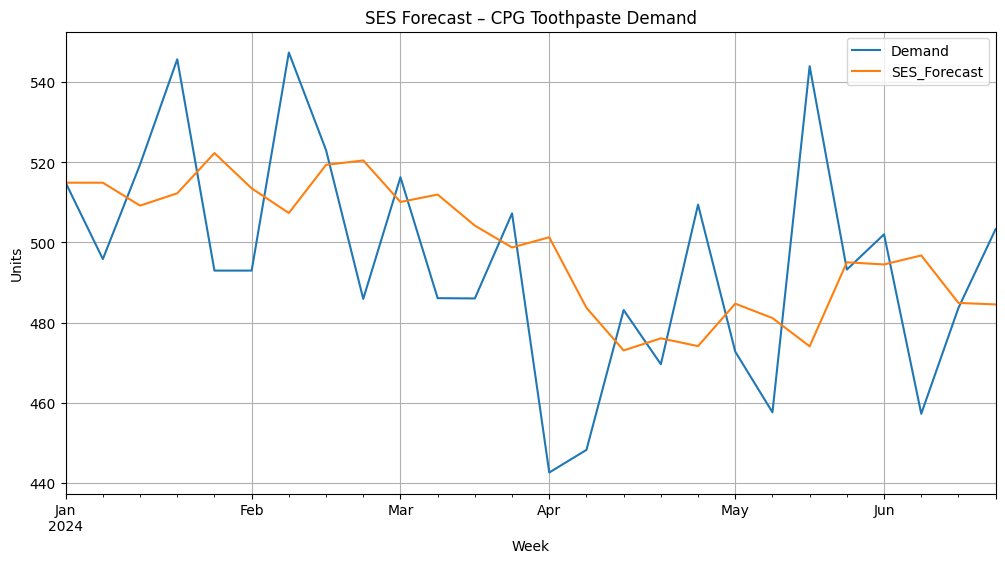

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Simulate 26 weeks of toothpaste demand
np.random.seed(42)
weeks = pd.date_range(start='2024-01-01', periods=26, freq='W-MON')
base_demand = 500
noise = np.random.normal(0, 30, 26)  # small weekly fluctuations
demand = base_demand + noise

df = pd.DataFrame({'Week': weeks, 'Demand': demand})
df.set_index('Week', inplace=True)

df.head()

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ensure weekly frequency is set
df.index.freq = 'W-MON'

# Apply SES
ses_model = SimpleExpSmoothing(df['Demand']).fit(smoothing_level=0.3, optimized=False)
df['SES_Forecast'] = ses_model.fittedvalues

# Plot results
df[['Demand', 'SES_Forecast']].plot(figsize=(12,6), title='SES Forecast – CPG Toothpaste Demand')
plt.ylabel('Units')
plt.grid(True)
plt.show()



# 📦 Project 2 – Simple Exponential Smoothing (SES) Forecast

## 🧠 Forecasting Technique: Simple Exponential Smoothing (SES)

Simple Exponential Smoothing is ideal for **short-term forecasting** when demand is stable and lacks strong trends or seasonality. It gives **more weight to recent observations**, making it a reliable method for responsive inventory or replenishment planning.

---

## 🏭 Industry Use Cases

### 🛒 1. Consumer Packaged Goods (CPG)
- **Use Case**: Weekly replenishment forecasting for high-volume items like toothpaste, soap, or toilet paper.
- **Why SES?**: Demand is stable with minor fluctuations — perfect for smoothing noise and adjusting to recent trends.

### 💊 2. Pharmaceutical Distribution
- **Use Case**: Predicting stock requirements for generic drugs.
- **Why SES?**: Prevents stockouts and overstock by using recent usage trends in hospitals and pharmacies.

### 🍔 3. Quick Service Restaurants (QSR)
- **Use Case**: Forecasting fresh ingredient use (e.g., buns, lettuce).
- **Why SES?**: Ingredients have consistent demand with small variations — SES helps avoid food waste.

### 🏭 4. Spare Parts in Manufacturing
- **Use Case**: Estimating the short-term need for critical spares (e.g., gaskets, belts).
- **Why SES?**: Smooths irregular maintenance consumption and supports just-in-time stocking.

### 📦 5. E-Commerce Fulfillment
- **Use Case**: Forecasting number of daily outbound packages for a fulfillment center.
